<a href="https://colab.research.google.com/github/AryKau33/Projects/blob/main/E_commerce_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-COMMERCE REVIEWS SENTIMENT ANALYSIS

In [ ]:
import nltk
nltk.download('punkt_tab')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("Dataset-SA.csv")

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   4750 non-null   object
 1   product_price  4750 non-null   int64 
 2   Rate           4750 non-null   int64 
 3   Review         4750 non-null   object
 4   Summary        4750 non-null   object
 5   Sentiment      4749 non-null   object
dtypes: int64(2), object(4)
memory usage: 222.8+ KB


In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,1


In [ ]:
text_df = df[['Review', 'Summary', 'Sentiment']]


In [ ]:
text_df.head()

,Review,Summary,Sentiment
0,super!,great cooler excellent air flow and for this p...,positive
1,awesome,best budget 2 fit cooler nice cooling,positive
2,fair,the quality is good but the power of air is de...,positive
3,useless product,very bad product its a only a fan,negative
4,fair,ok ok product,neutral


In [ ]:
text_df.shape
df = text_df

In [ ]:
df = df.dropna()
df.shape

(4749, 3)

In [ ]:
df.describe()

,Review,Summary,Sentiment
count,4749,4749,4749
unique,117,3572,3
top,wonderful,good,positive
freq,243,181,4005


In [ ]:
def clean_text(text):
    """
    Function to clean the input text by:
    - Removing special characters, numbers, and punctuation
    - Converting text to lowercase
    - Removing extra whitespaces
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading and trailing whitespaces
    return text

# Apply the cleaning function to the review column, using the correct column name 'Review'
df['cleaned_review'] = df['Review'].apply(clean_text)

In [ ]:
def preprocess_text(text):
    """
    Function to preprocess text by:
    - Tokenizing (splitting into words)
    - Removing stopwords
    - Lemmatizing each word
    """

    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer() # Initialize the lemmatizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each word

    return ' '.join(tokens)

# Apply the cleaning function to the Summary column, creating 'cleaned_summary'
df['cleaned_summary'] = df['Summary'].apply(clean_text)

# Now you can apply preprocessing to the cleaned Review and Summary columns
df['processed_review'] = df['cleaned_review'].apply(preprocess_text)
df['processed_summary'] = df['cleaned_summary'].apply(preprocess_text)

In [ ]:
df.head()

,Review,Summary,Sentiment,cleaned_review,cleaned_summary,processed_review,processed_summary
0,super!,great cooler excellent air flow and for this p...,positive,super,great cooler excellent air flow and for this p...,super,great cooler excellent air flow price amazing ...
1,awesome,best budget 2 fit cooler nice cooling,positive,awesome,best budget fit cooler nice cooling,awesome,best budget fit cooler nice cooling
2,fair,the quality is good but the power of air is de...,positive,fair,the quality is good but the power of air is de...,fair,quality good power air decent
3,useless product,very bad product its a only a fan,negative,useless product,very bad product its a only a fan,useless product,bad product fan
4,fair,ok ok product,neutral,fair,ok ok product,fair,ok ok product


In [ ]:
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_review']))
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_summary']))

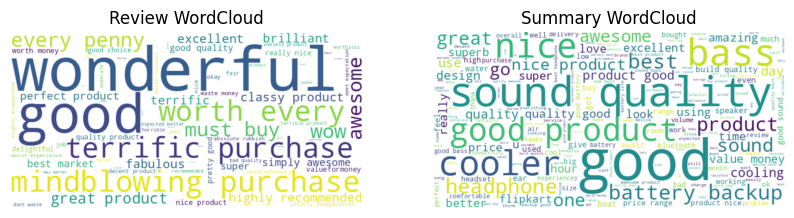

In [ ]:
# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.title('Review WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Summary WordCloud')

plt.show()


In [ ]:
# Combine both processed review and summary text for feature extraction
df['processed_text'] = df['processed_review'] + ' ' + df['processed_summary']

In [ ]:
# Extract the features (processed_text) and labels (Sentiment)
X = df['processed_text']
y = df['Sentiment']  # Sentiment column is the target variable

In [ ]:
# Convert text data to numerical data using TF-IDF without limiting the number of features
vectorizer = TfidfVectorizer(max_features=None)
X = vectorizer.fit_transform(X).toarray()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize classifiers
logistic_model = LogisticRegression(max_iter=1000)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')

Logistic Regression Accuracy: 0.92
Naive Bayes Accuracy: 0.8768421052631579
Support Vector Machine Accuracy: 0.9221052631578948

The Best Model is: Support Vector Machine with Accuracy: 0.9221052631578948


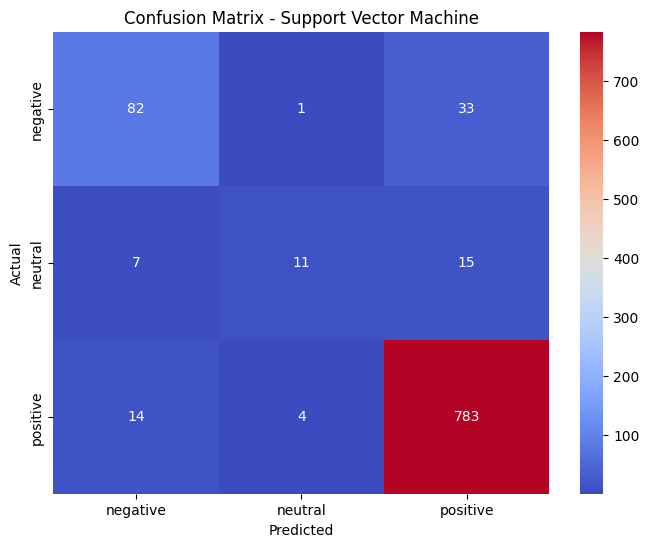


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

    negative       0.80      0.71      0.75       116
     neutral       0.69      0.33      0.45        33
    positive       0.94      0.98      0.96       801

    accuracy                           0.92       950
   macro avg       0.81      0.67      0.72       950
weighted avg       0.92      0.92      0.92       950



In [ ]:
# Dictionary to store models and their accuracy
model_scores = {}

# Train Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
model_scores["Logistic Regression"] = accuracy_logistic
print("Logistic Regression Accuracy:", accuracy_logistic)

# Train Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
model_scores["Naive Bayes"] = accuracy_nb
print("Naive Bayes Accuracy:", accuracy_nb)

# Train Support Vector Machine
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
model_scores["Support Vector Machine"] = accuracy_svm
print("Support Vector Machine Accuracy:", accuracy_svm)

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_accuracy = model_scores[best_model_name]
print(f"\nThe Best Model is: {best_model_name} with Accuracy: {best_model_accuracy}")

# Display confusion matrix and classification report for the best model
if best_model_name == "Logistic Regression":
    y_pred_best = y_pred_logistic
elif best_model_name == "Naive Bayes":
    y_pred_best = y_pred_nb
else:
    y_pred_best = y_pred_svm

# Confusion Matrix for the Best Model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for the Best Model
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_logistic_model = grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9212949864780529


In [ ]:
from sklearn.svm import SVC

# Define parameter grid for Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Types of kernel
    'gamma': [1, 0.1, 0.01]  # Kernel coefficient for 'rbf'
}

# Initialize SVM model
svm_model = SVC()

# Set up GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Get the best model and its parameters
best_svm_model = grid_search_svm.best_estimator_
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9202427016156994
